In [10]:
import pandas as pd
import numpy as np
import statsmodels as sm


In [11]:
# Replace this with your actual file path if different
file_path = 'Week 1 data forlab1.xlsx'

try:
  df = pd.read_excel(file_path)
  print(df.head()) # Print the first few rows to verify import
except FileNotFoundError:
  print(f"Error: File not found at {file_path}. Please check the file path.")
except Exception as e:
  print(f"An error occurred: {e}")


  Unnamed: 0     GDP     PCE    Inv       G
0 1980-03-01  5903.4  3796.7  778.3  1365.4
1 1980-06-01  5782.4  3710.5  708.1  1369.7
2 1980-09-01  5771.7  3750.3  654.1  1350.8
3 1980-12-01  5878.4  3800.3  720.6  1349.4
4 1981-03-01  6000.6  3821.1  792.2  1367.3


In [12]:
import matplotlib.pyplot as plt

In [13]:
datats=pd.read_excel("Week 1 data forlab1.xlsx")
datats.head()

,Unnamed: 0,GDP,PCE,Inv,G
0,1980-03-01,5903.4,3796.7,778.3,1365.4
1,1980-06-01,5782.4,3710.5,708.1,1369.7
2,1980-09-01,5771.7,3750.3,654.1,1350.8
3,1980-12-01,5878.4,3800.3,720.6,1349.4
4,1981-03-01,6000.6,3821.1,792.2,1367.3


In [14]:
tseries=datats.rename(columns={"Unnamed: 0" : 'Date'})
print(tseries)
type(tseries)


          Date      GDP     PCE     Inv       G
0   1980-03-01   5903.4  3796.7   778.3  1365.4
1   1980-06-01   5782.4  3710.5   708.1  1369.7
2   1980-09-01   5771.7  3750.3   654.1  1350.8
3   1980-12-01   5878.4  3800.3   720.6  1349.4
4   1981-03-01   6000.6  3821.1   792.2  1367.3
..         ...      ...     ...     ...     ...
124 2011-03-01  13227.9  9376.7  1750.9  2513.9
125 2011-06-01  13271.8  9392.7  1778.4  2508.2
126 2011-09-01  13331.6  9433.5  1784.2  2507.6
127 2011-12-01  13429.0  9482.1  1875.7  2481.2
128 2012-03-01  13502.4  9550.2  1903.0  2462.2

[129 rows x 5 columns]


pandas.core.frame.DataFrame

In [15]:
# prompt: estimate a linear regression of GDP on Inv and G

import statsmodels.api as sm

# Assuming 'GDP', 'Inv', and 'G' are column names in your DataFrame 'tseries'
X = tseries[['Inv', 'G']]  # Independent variables
y = tseries['GDP']        # Dependent variable

# Add a constant to the independent variables (intercept term)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     6055.
Date:                Sat, 08 Mar 2025   Prob (F-statistic):          6.37e-126
Time:                        11:05:57   Log-Likelihood:                -898.73
No. Observations:                 129   AIC:                             1803.
Df Residuals:                     126   BIC:                             1812.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2218.9234    156.289    -14.198      0.0

Sample size: 86
G coefficients: 3.4331

Sample size: 96
G coefficients: 3.4343

Sample size: 106
G coefficients: 3.4247

Sample size: 116
G coefficients: 3.7466

Sample size: 126
G coefficients: 4.6334

Sample size: 129
G coefficients: 4.7309



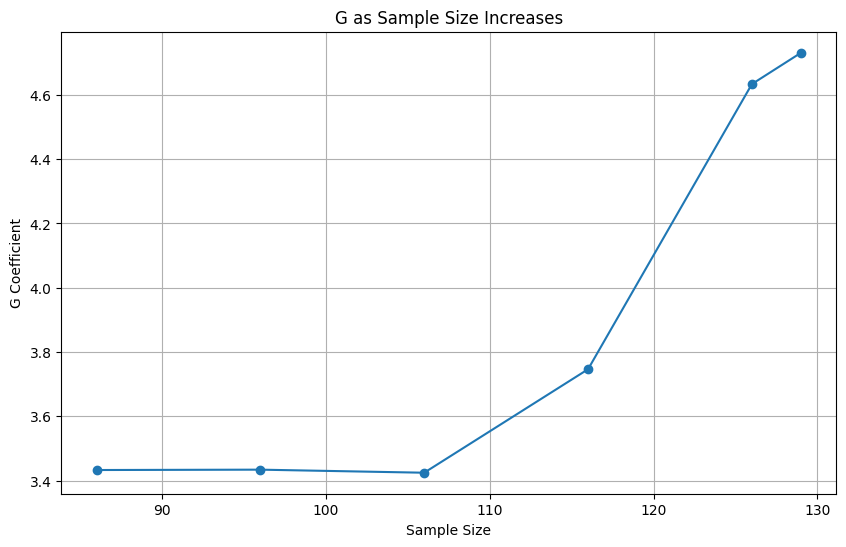


Summary of Coefficients:
   Sample_Size  G_Coefficients
0           86        3.433139
1           96        3.434272
2          106        3.424744
3          116        3.746558
4          126        4.633383
5          129        4.730916


In [18]:
# exercise 2 : write a loop  which estimates the G coeff for the first 2/3 of the data only and then re estimate the G coeff adding 10 extra observations per step and compare the different G

# Marwin's Answer:
initial_sample = int(len(tseries) * 2/3)  # calculate the initial sample size

# calculate the number of iters we will need
remaining_obs = len(tseries) - initial_sample
steps = int(np.ceil(remaining_obs/10))

g_coefficients = []
sample_sizes = []

for i in range(steps + 1):
    end_idx = min(initial_sample + (i*10), len(tseries))

    current_sample = tseries.iloc[:end_idx]

    X = current_sample[['Inv', 'G']]
    y = current_sample['GDP']
    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()

    g_coefficients.append(model.params['G'])
    sample_sizes.append(end_idx)

    print(f'Sample size: {end_idx}')
    print(f'G coefficients: {model.params['G']:.4f}\n')

# plot
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, g_coefficients, marker='o')
plt.title('G as Sample Size Increases')
plt.xlabel('Sample Size')
plt.ylabel('G Coefficient')
plt.grid(True)
plt.show()

# dataframe summary if you want
results_df = pd.DataFrame({
    'Sample_Size': sample_sizes,
    'G_Coefficients': g_coefficients
})
print('\nSummary of Coefficients:')
print(results_df)

In [19]:
impact=model.params[2]
print(impact)


4.730915754646568


C:\Users\marwi\AppData\Local\Temp\ipykernel_25576\3433103035.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  impact=model.params[2]


                            AutoReg Model Results                             
Dep. Variable:                    GDP   No. Observations:                  129
Model:                   AutoReg-X(2)   Log Likelihood                -695.482
Method:               Conditional MLE   S.D. of innovations             57.818
Date:                Sat, 08 Mar 2025   AIC                           1402.963
Time:                        11:20:31   BIC                           1420.028
Sample:                             2   HQIC                          1409.896
                                  129                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -54.7172     58.130     -0.941      0.347    -168.650      59.216
GDP.L1         1.2983      0.090     14.384      0.000       1.121       1.475
GDP.L2        -0.3599      0.083     -4.353      0.0

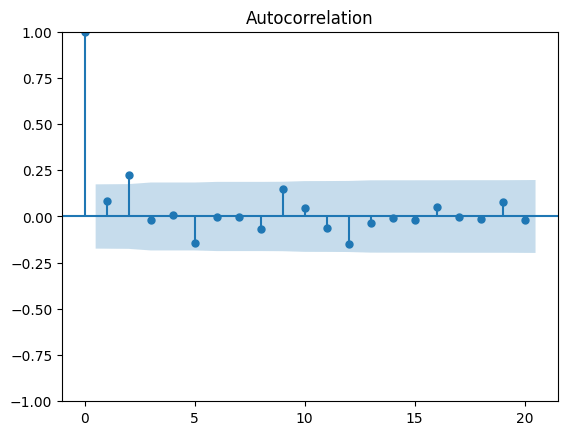

Ljung-Box Test Results


,lb_stat,lb_pvalue,bp_stat,bp_pvalue
10,14.414312,0.154918,13.697885,0.187223


In [20]:
# prompt: estimated a threshold autoregression  model of GDP on Inv and G

import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
import statsmodels.api as sm

# Assuming 'GDP', 'Inv', and 'G' are column names in your DataFrame 'tseries'
# and you have already loaded the data and performed the initial OLS regression.

# Example using GDP as the endogenous variable and lags 1 and 2 of the series.
# Replace 1 and 2 with your lags
lags = [1,2]
model_ar = AutoReg(tseries['GDP'], lags=lags, exog=tseries[['Inv','G']]).fit()

print(model_ar.summary())


# You can also use the fitted values from the model
# to check residual autocorrelation

# Examine the residual autocorrelation function (ACF)
from statsmodels.graphics.tsaplots import plot_acf

residuals = model_ar.resid

plot_acf(residuals, lags=20)  # Adjust lags as needed
plt.show()

#Test for residual autocorrelation using Ljung-Box Test
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(residuals, lags=[10], boxpierce=True) #Test for autocorrelation up to lag 10
print("Ljung-Box Test Results")
lb_test


# Iterate through various lag lengths to find an optimal model for the residuals
# based on AIC
# lag_range = range(1, 11)  # Consider lags 1 through 10
# best_aic = float('inf')
# best_lag = None
# for lag in lag_range:
#   try:
#       model = AutoReg(residuals, lags=lag).fit()  # Fit an AR model
#       if model.aic < best_aic:  # Compare using AIC
#           best_aic = model.aic
#           best_lag = lag
#       print(f"Lag {lag}, AIC {model.aic}")  # Check AIC for each lag
#   except:
#       print(f"Lag {lag} - Not suitable for AutoRegression")

# print(f"Best lag order according to AIC: {best_lag}")




In [21]:
tseries['Date'] = pd.to_datetime(tseries['Date'])
data = tseries.loc[(tseries['Date'] >= '2009-01-01') & (tseries['Date'] <= '2011-12-31'), ['Date','G', 'Inv']]
print(data)

          Date       G     Inv
116 2009-03-01  2509.6  1490.4
117 2009-06-01  2546.0  1397.2
118 2009-09-01  2554.2  1407.3
119 2009-12-01  2548.5  1522.0
120 2010-03-01  2540.6  1630.0
121 2010-06-01  2564.0  1728.3
122 2010-09-01  2570.3  1766.8
123 2010-12-01  2552.1  1734.5
124 2011-03-01  2513.9  1750.9
125 2011-06-01  2508.2  1778.4
126 2011-09-01  2507.6  1784.2
127 2011-12-01  2481.2  1875.7


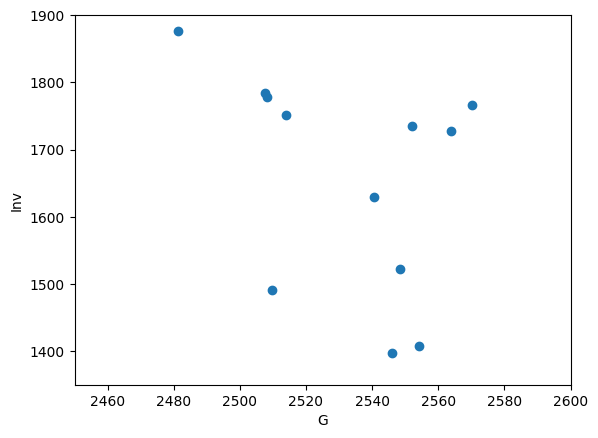

In [22]:
#Assign values to variables for scatter
x = data[['G']]
y = data['Inv']
#Create ScatterPlot of of Inv on y and G on x axis
plt.scatter(x, y) # we are after this
#Legend and Labels
plt.legend #very nice for representation
plt.xlabel('G')
plt.ylabel('Inv')
#Set y and x Axis limits
plt.xlim(2450, 2600)
plt.ylim(1350, 1900)
#Display ScatterPlot
plt.show()

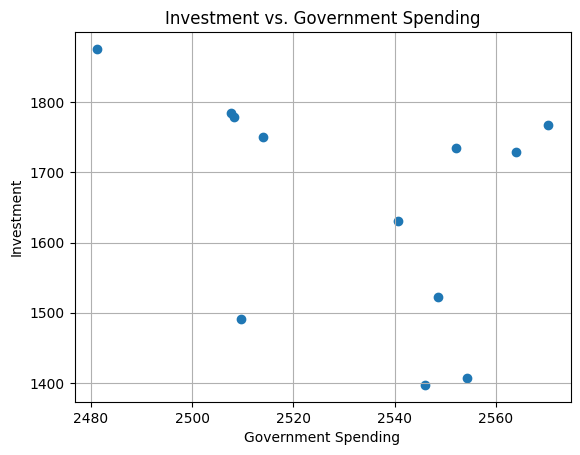

In [23]:
#Other solution

# Example data
Gov = data['G']  # Government spending
Inv = data['Inv']  # Investment

# Creating the scatter plot
plt.scatter(Gov, Inv) #function
plt.title('Investment vs. Government Spending')
plt.xlabel('Government Spending')
plt.ylabel('Investment')
plt.grid(True)
plt.show()

In [24]:
type(Gov)

pandas.core.series.Series

In [26]:
#lecture code below

In [27]:
import pandas as pd
import numpy as np

In [28]:
import statsmodels.formula.api as smf

In [30]:
from sklearn.linear_model import  LinearRegression as lr

In [31]:
# re load the data from last week , we re do the same steps first
datats=pd.read_excel("Week 1 data forlab1.xlsx")
tseries=datats.rename(columns={"Unnamed: 0" : 'Date'})
print(tseries)
#look at the index

          Date      GDP     PCE     Inv       G
0   1980-03-01   5903.4  3796.7   778.3  1365.4
1   1980-06-01   5782.4  3710.5   708.1  1369.7
2   1980-09-01   5771.7  3750.3   654.1  1350.8
3   1980-12-01   5878.4  3800.3   720.6  1349.4
4   1981-03-01   6000.6  3821.1   792.2  1367.3
..         ...      ...     ...     ...     ...
124 2011-03-01  13227.9  9376.7  1750.9  2513.9
125 2011-06-01  13271.8  9392.7  1778.4  2508.2
126 2011-09-01  13331.6  9433.5  1784.2  2507.6
127 2011-12-01  13429.0  9482.1  1875.7  2481.2
128 2012-03-01  13502.4  9550.2  1903.0  2462.2

[129 rows x 5 columns]


In [32]:

tseries['Date'] = pd.to_datetime(tseries['Date'])
data = tseries.loc[(tseries['Date'] >= '2009-01-01') & (tseries['Date'] <= '2011-12-31'), ['Date','G', 'Inv']]
print(data)
# this is a panda dataframe and the index is the number of observations, let us see if we like this as we proceed.

          Date       G     Inv
116 2009-03-01  2509.6  1490.4
117 2009-06-01  2546.0  1397.2
118 2009-09-01  2554.2  1407.3
119 2009-12-01  2548.5  1522.0
120 2010-03-01  2540.6  1630.0
121 2010-06-01  2564.0  1728.3
122 2010-09-01  2570.3  1766.8
123 2010-12-01  2552.1  1734.5
124 2011-03-01  2513.9  1750.9
125 2011-06-01  2508.2  1778.4
126 2011-09-01  2507.6  1784.2
127 2011-12-01  2481.2  1875.7


In [33]:
#we can do descriptive stats in pandas
data.describe()

,Date,G,Inv
count,12,12.000000,12.000000
mean,2010-07-16 18:00:00,2533.016667,1655.475000
min,2009-03-01 00:00:00,2481.200000,1397.200000
25%,2009-11-08 06:00:00,2509.250000,1514.100000
50%,2010-07-17 00:00:00,2543.300000,1731.400000
75%,2011-03-24 00:00:00,2552.625000,1769.700000
max,2011-12-01 00:00:00,2570.300000,1875.700000
std,NaN,27.780563,161.593897


In [34]:
data.corr()

,Date,G,Inv
Date,1.000000,-0.504034,0.921567
G,-0.504034,1.000000,-0.377629
Inv,0.921567,-0.377629,1.000000


In [35]:
data.skew(axis=0)

# gets me the following type error:
"""
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[35], line 1
----> 1 data.skew(axis=0)

File c:\Users\marwi\miniconda3\envs\programming_in_python\Lib\site-packages\pandas\core\frame.py:11761, in DataFrame.skew(self, axis, skipna, numeric_only, **kwargs)
  11753 @doc(make_doc("skew", ndim=2))
  11754 def skew(
  11755     self,
   (...)
  11759     **kwargs,
  11760 ):
> 11761     result = super().skew(axis, skipna, numeric_only, **kwargs)
  11762     if isinstance(result, Series):
  11763         result = result.__finalize__(self, method="skew")

File c:\Users\marwi\miniconda3\envs\programming_in_python\Lib\site-packages\pandas\core\generic.py:12442, in NDFrame.skew(self, axis, skipna, numeric_only, **kwargs)
  12435 def skew(
  12436     self,
  12437     axis: Axis | None = 0,
   (...)
  12440     **kwargs,
  12441 ) -> Series | float:
> 12442     return self._stat_function(
  12443         "skew", nanops.nanskew, axis, skipna, numeric_only, **kwargs
...
   1957     )
   1958 result = meth(skipna=skipna, **kwargs)
   1959 if keepdims:

TypeError: 'DatetimeArray' with dtype datetime64[ns] does not support reduction 'skew'
"""

TypeError: 'DatetimeArray' with dtype datetime64[ns] does not support reduction 'skew'

In [37]:
# fix:
# Calculate skewness only for numeric columns (G and Inv)
numeric_data = data[['G', 'Inv']]
skewness = numeric_data.skew(axis=0)
print("\nSkewness for numeric columns:")
print(skewness)


Skewness for numeric columns:
G     -0.439088
Inv   -0.558609
dtype: float64


In [38]:
data.kurtosis(axis=0)

# gets me the following type error:
"""
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[36], line 1
----> 1 data.kurtosis(axis=0)

File c:\Users\marwi\miniconda3\envs\programming_in_python\Lib\site-packages\pandas\core\frame.py:11774, in DataFrame.kurt(self, axis, skipna, numeric_only, **kwargs)
  11766 @doc(make_doc("kurt", ndim=2))
  11767 def kurt(
  11768     self,
   (...)
  11772     **kwargs,
  11773 ):
> 11774     result = super().kurt(axis, skipna, numeric_only, **kwargs)
  11775     if isinstance(result, Series):
  11776         result = result.__finalize__(self, method="kurt")

File c:\Users\marwi\miniconda3\envs\programming_in_python\Lib\site-packages\pandas\core\generic.py:12453, in NDFrame.kurt(self, axis, skipna, numeric_only, **kwargs)
  12446 def kurt(
  12447     self,
  12448     axis: Axis | None = 0,
   (...)
  12451     **kwargs,
  12452 ) -> Series | float:
> 12453     return self._stat_function(
  12454         "kurt", nanops.nankurt, axis, skipna, numeric_only, **kwargs
...
   1957     )
   1958 result = meth(skipna=skipna, **kwargs)
   1959 if keepdims:

TypeError: 'DatetimeArray' with dtype datetime64[ns] does not support reduction 'kurt'
"""

TypeError: 'DatetimeArray' with dtype datetime64[ns] does not support reduction 'kurt'

In [40]:
# fix:
# Calculate kurt only for numeric columns (G and Inv)
numeric_data = data[['G', 'Inv']]
kurtosis = numeric_data.kurtosis(axis=0)
print("\nKurtosis for numeric columns:")
print(kurtosis)


Kurtosis for numeric columns:
G     -0.933519
Inv   -1.153393
dtype: float64


In [43]:
#exercise 1 for week 6 find out how you can perfor the JB test on each variable

# Marwin's solution:
from scipy import stats

jb_test_G = stats.jarque_bera(tseries['G'])
jb_test_Inv = stats.jarque_bera(tseries['Inv'])

print("Jarque-Bera test results for G:")
print(f"Statistic: {jb_test_G.statistic:.4f}")
print(f"P-value: {jb_test_G.pvalue:.4f}")
print("\nInterpretation for G:")
print("Null hypothesis (normal distribution) is", 
      "rejected" if jb_test_G.pvalue < 0.05 else "not rejected", 
      "at 5% significance level")


Jarque-Bera test results for G:
Statistic: 5.9840
P-value: 0.0502

Interpretation for G:
Null hypothesis (normal distribution) is not rejected at 5% significance level


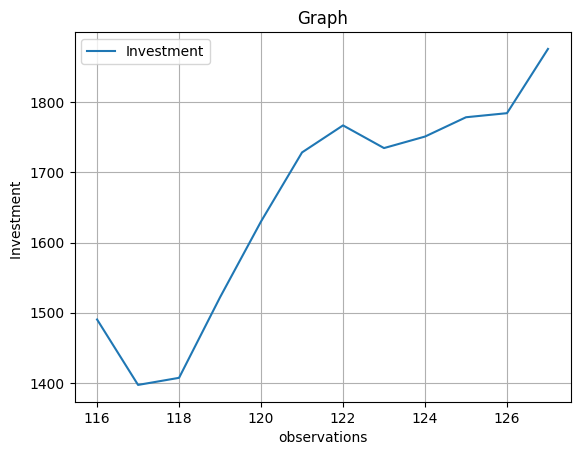

In [44]:
#how can we plot?  we are by defualt plotting against the index which is number of observations,
import matplotlib.pyplot as plt
#we import this new library matplotlib
plt.figure(1)
plt.plot(data['Inv'], label='Investment')
plt.xlabel('observations')
plt.ylabel('Investment ')
plt.title('Graph')
plt.grid(True)
plt.legend()
plt.show()


Text(0.5, 1.0, 'Inv')

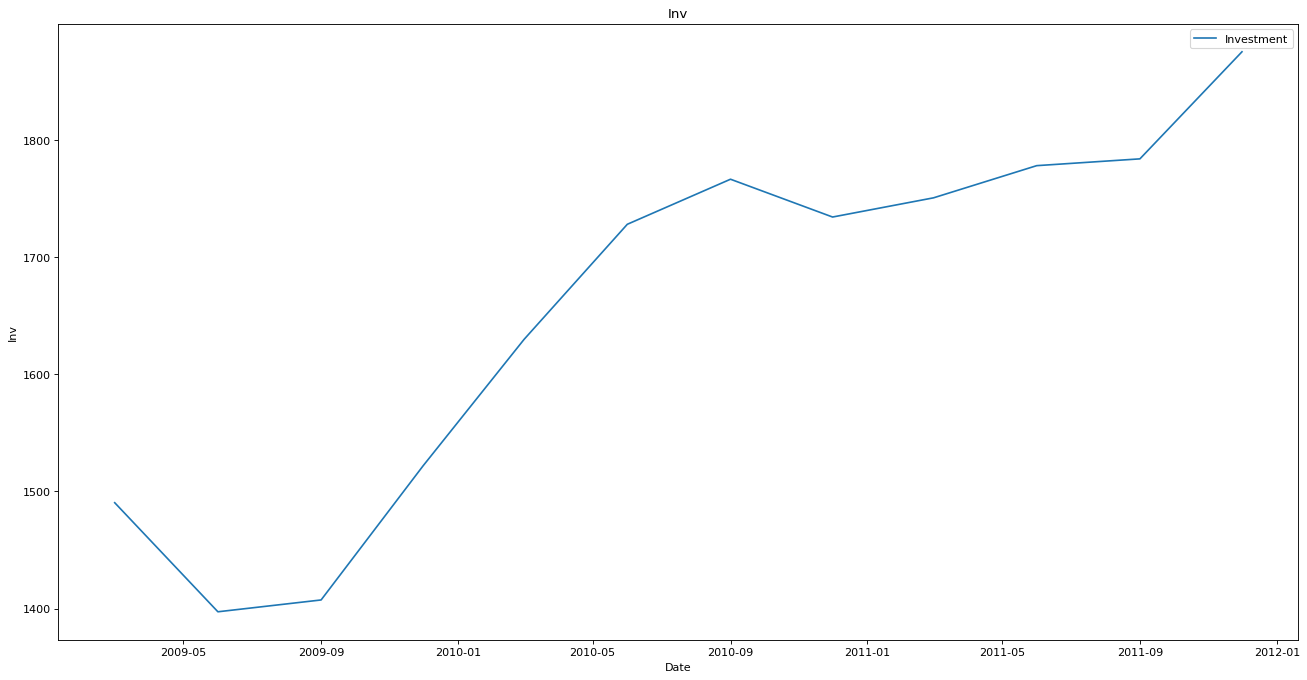

In [45]:
plt.figure(figsize=(20, 10), dpi=80)
plt.plot(data['Date'], data['Inv'], label = "Investment")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Inv')
plt.title('Inv')
#plt.savefig(Invplot.pdf") #save plot as pdf f

Text(0.5, 1.0, 'Inv')

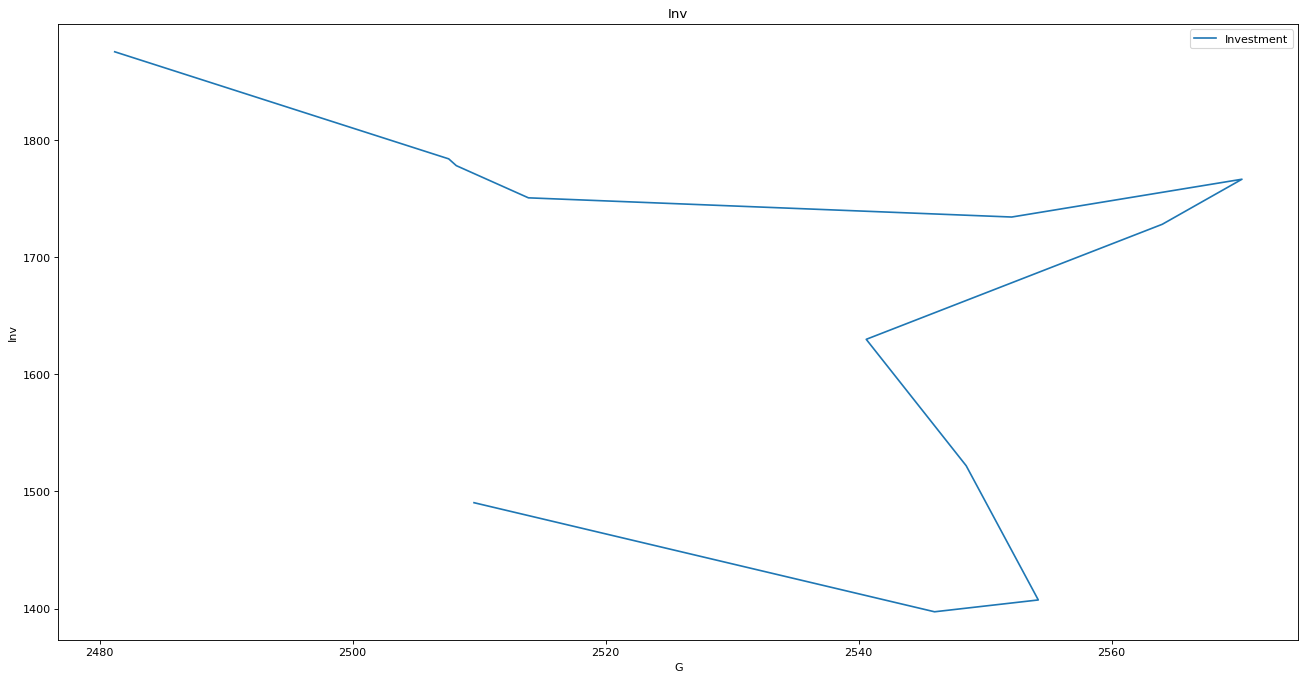

In [46]:
plt.figure(figsize=(20, 10), dpi=80)
plt.plot(data['G'], data['Inv'], label = "Investment")
plt.legend()
plt.xlabel('G')
plt.ylabel('Inv')
plt.title('Inv')
#plt.savefig(Invplot.pdf") #save plot as pdf f

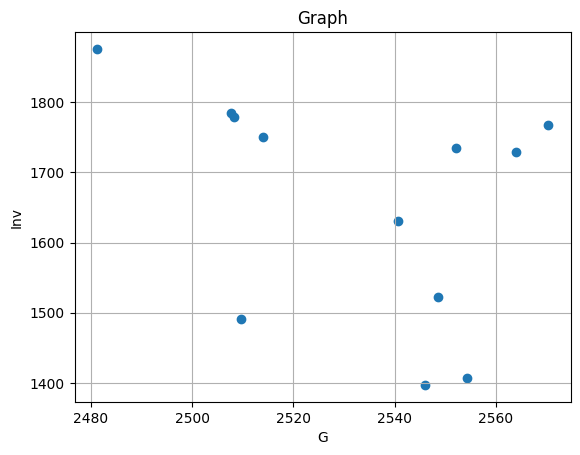

In [47]:
plt.figure(2)
plt.scatter(data['G'], data['Inv'])
plt.xlabel('G')
plt.ylabel('Inv')
plt.title('Graph')
plt.grid(True)
plt.show()

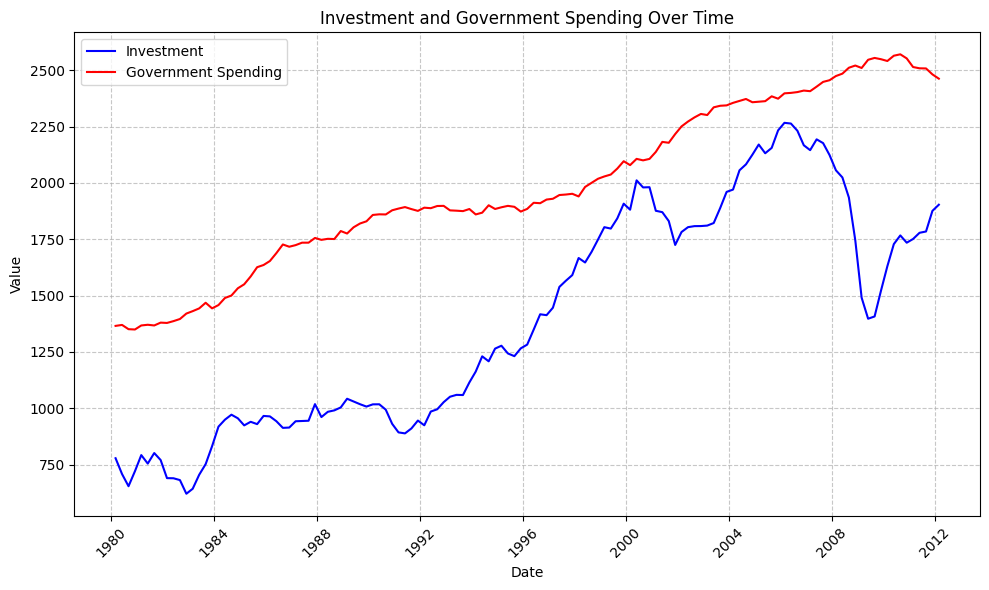

In [50]:
#excercise 2  for week 6 : plot Inv and G  in the same graph over time , with time on the x dmensions

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# plot both lines using the tseries dataset
plt.plot(tseries['Date'], tseries['Inv'], label='Investment', color='blue')
plt.plot(tseries['Date'], tseries['G'], label='Government Spending', color='red')

# customize the plot
plt.title('Investment and Government Spending Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# rotate xlabels for better readability
plt.xticks(rotation=45)  # rotate by 45°

plt.tight_layout()
plt.show()

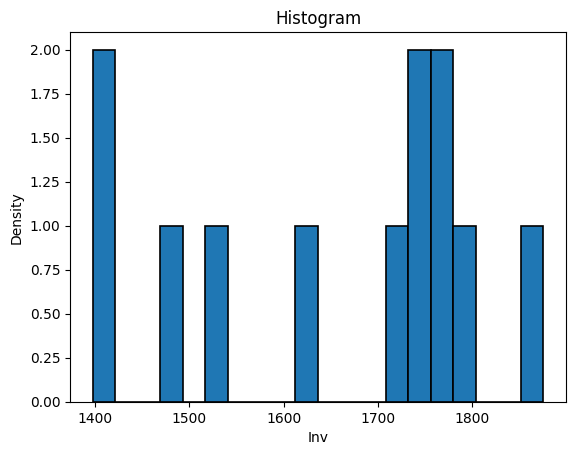

In [51]:
plt.figure(3)
plt.hist(data['Inv'], 20, edgecolor='black', linewidth=1.2)
plt.xlabel('Inv')
plt.ylabel('Density')
plt.title('Histogram')
plt.show()


In [52]:
#end of plots beginning of regression in statsmodels

In [53]:

formula = ' Inv~ G'
results = smf.ols(formula, tseries).fit()
print(results.summary())
type(results)

                            OLS Regression Results                            
Dep. Variable:                    Inv   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     405.9
Date:                Sat, 08 Mar 2025   Prob (F-statistic):           2.26e-41
Time:                        11:35:48   Log-Likelihood:                -890.63
No. Observations:                 129   AIC:                             1785.
Df Residuals:                     127   BIC:                             1791.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -959.6329    118.833     -8.076      0.0

statsmodels.regression.linear_model.RegressionResultsWrapper

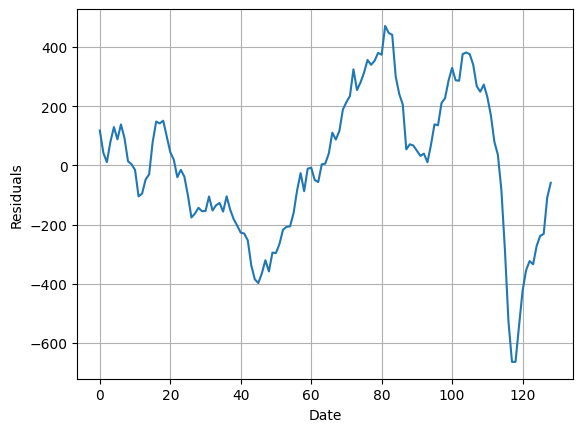

In [54]:
plt.figure(5)
plt.plot(results.resid)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [55]:
hypothesis= 'G=0.6'
f_test = results.f_test(hypothesis)
print(f_test)

<F test: F=99.20319691349421, p=1.2729946543140549e-17, df_denom=127, df_num=1>


In [57]:
#let us go back to the original data with all the variables
datats=pd.read_excel("Week 1 data forlab1.xlsx")
tseries=datats.rename(columns={"Unnamed: 0" : 'Date'})
print(tseries)


          Date      GDP     PCE     Inv       G
0   1980-03-01   5903.4  3796.7   778.3  1365.4
1   1980-06-01   5782.4  3710.5   708.1  1369.7
2   1980-09-01   5771.7  3750.3   654.1  1350.8
3   1980-12-01   5878.4  3800.3   720.6  1349.4
4   1981-03-01   6000.6  3821.1   792.2  1367.3
..         ...      ...     ...     ...     ...
124 2011-03-01  13227.9  9376.7  1750.9  2513.9
125 2011-06-01  13271.8  9392.7  1778.4  2508.2
126 2011-09-01  13331.6  9433.5  1784.2  2507.6
127 2011-12-01  13429.0  9482.1  1875.7  2481.2
128 2012-03-01  13502.4  9550.2  1903.0  2462.2

[129 rows x 5 columns]


In [58]:
type(tseries.loc[0,'Date'])
#we are checking the time label

pandas._libs.tslibs.timestamps.Timestamp

In [60]:
datats=pd.read_excel("Week 1 data forlab1.xlsx",index_col=0)
tseries=datats.rename(columns={"Unnamed: 0" : 'Date'})
#no longer effective this is not a column anymore
print(tseries)

                GDP     PCE     Inv       G
1980-03-01   5903.4  3796.7   778.3  1365.4
1980-06-01   5782.4  3710.5   708.1  1369.7
1980-09-01   5771.7  3750.3   654.1  1350.8
1980-12-01   5878.4  3800.3   720.6  1349.4
1981-03-01   6000.6  3821.1   792.2  1367.3
...             ...     ...     ...     ...
2011-03-01  13227.9  9376.7  1750.9  2513.9
2011-06-01  13271.8  9392.7  1778.4  2508.2
2011-09-01  13331.6  9433.5  1784.2  2507.6
2011-12-01  13429.0  9482.1  1875.7  2481.2
2012-03-01  13502.4  9550.2  1903.0  2462.2

[129 rows x 4 columns]


NameError: name 'GDP' is not defined

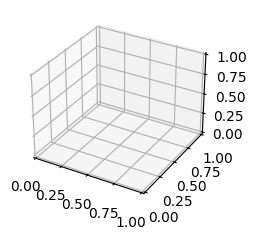

In [61]:
from matplotlib import cm

plt.style.use('_mpl-gallery')
# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface('Inv','GDP','PCE',vmin=GDP.min() * 2, cmap=cm.Blues)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()
#here we get an error because this sublibrary requires 2D array , # difficult excercise 4:
# how can you trasform pandas data frame column into arrays? do the plot

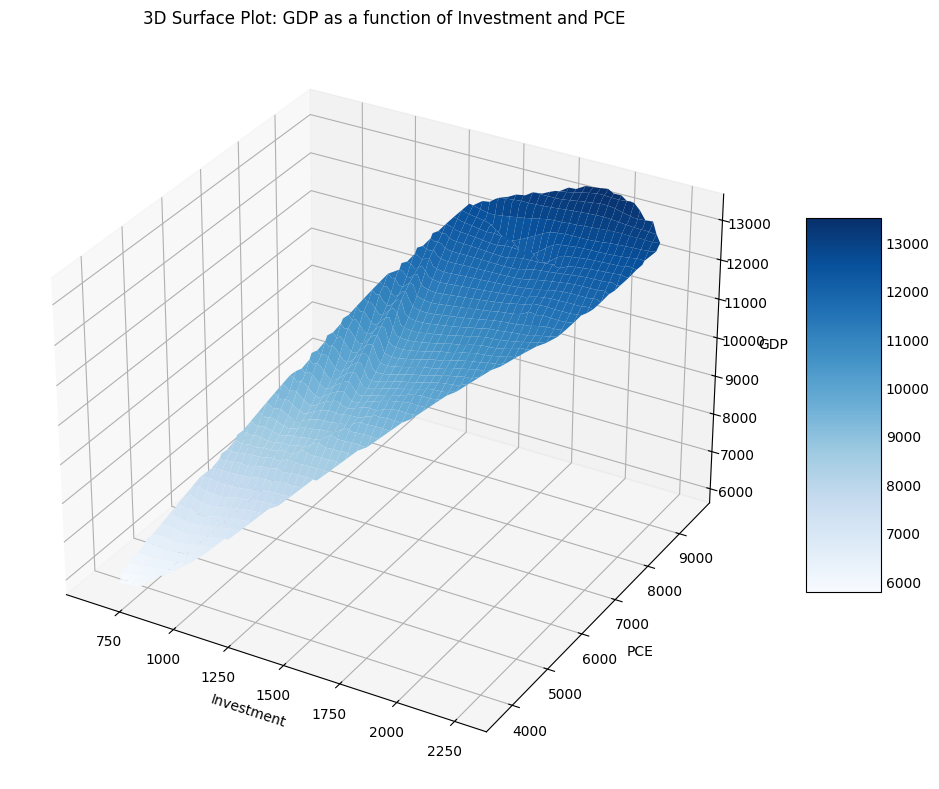

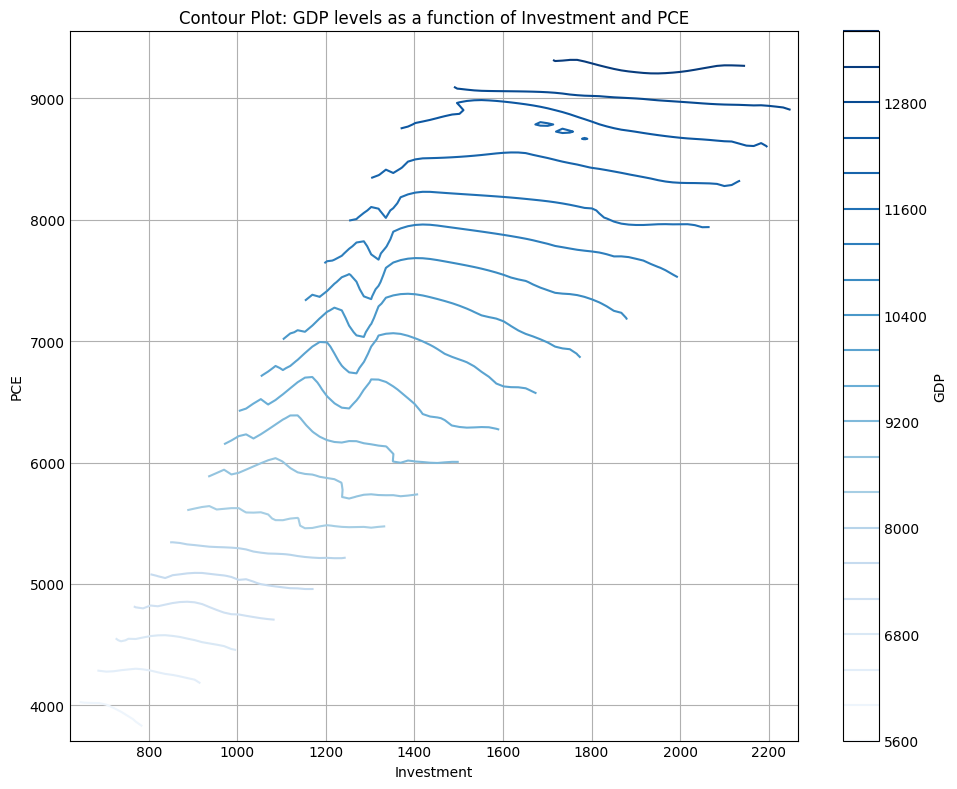

In [63]:
# Marwin's Solution:

# Create a meshgrid from Inv and PCE values
# First, create evenly spaced points for both variables
inv_points = np.linspace(tseries['Inv'].min(), tseries['Inv'].max(), 100)
pce_points = np.linspace(tseries['PCE'].min(), tseries['PCE'].max(), 100)

# Create 2D arrays of coordinates
Inv_mesh, PCE_mesh = np.meshgrid(inv_points, pce_points)

# Create a function to interpolate GDP values
from scipy.interpolate import griddata
GDP_mesh = griddata(
    (tseries['Inv'], tseries['PCE']),  # Original points
    tseries['GDP'],                     # Original values
    (Inv_mesh, PCE_mesh),              # Points to interpolate
    method='cubic'                      # Interpolation method
)

# Create the 3D plot
plt.style.use('_mpl-gallery')
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 8))

# Plot the surface
surf = ax.plot_surface(
    Inv_mesh, 
    PCE_mesh, 
    GDP_mesh, 
    vmin=tseries['GDP'].min(), 
    vmax=tseries['GDP'].max(),
    cmap=cm.Blues
)

# Customize the plot
ax.set_xlabel('Investment')
ax.set_ylabel('PCE')
ax.set_zlabel('GDP')
ax.set_title('3D Surface Plot: GDP as a function of Investment and PCE')

# Add a color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

# Just for fun, let's also create a contour plot to better visualize the relationships
plt.figure(figsize=(10, 8))
plt.contour(Inv_mesh, PCE_mesh, GDP_mesh, levels=20, cmap='Blues')
plt.colorbar(label='GDP')
plt.xlabel('Investment')
plt.ylabel('PCE')
plt.title('Contour Plot: GDP levels as a function of Investment and PCE')
plt.tight_layout()
plt.show()

In [64]:
Model = 'Inv ~ GDP + PCE + G '
results = smf.ols(Model, datats).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    Inv   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     744.6
Date:                Sat, 08 Mar 2025   Prob (F-statistic):           1.61e-79
Time:                        11:43:52   Log-Likelihood:                -793.66
No. Observations:                 129   AIC:                             1595.
Df Residuals:                     125   BIC:                             1607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    147.9009    143.009      1.034      0.3

In [65]:
# postestmation diagnostic tests
#revised the basics

In [66]:
import statsmodels.tsa.api as smt
import pickle
#this is the time series package of statsmodel

In [67]:
acf,q,pval = smt.acf(datats['Inv'],nlags=12,qstat=True)
pacf = smt.pacf(datats['Inv'],nlags=12)
correlogram = pd.DataFrame({'acf':acf[1:],
'pacf':pacf[1:],
'Q':q,
'p-val':pval})
correlogram

,acf,pacf,Q,p-val
0,0.983498,0.991181,127.702023,1.304255e-29
1,0.960489,-0.388739,250.457715,4.109587e-55
2,0.934772,-0.039348,367.650672,2.246494e-79
3,0.908918,0.048334,479.337085,1.971033e-102
4,0.885514,0.136111,586.200749,1.937465e-124
5,0.862268,-0.136729,688.351310,2.002010e-145
6,0.839085,-0.010674,785.875668,2.071406e-165
7,0.815486,-0.030652,878.752775,2.160663e-184
8,0.792618,0.086584,967.225046,2.009069e-202
9,0.770467,-0.039281,1051.524068,1.481515e-219


In [68]:
res = smt.ARIMA(data['Inv'], order=(1,0,0)).fit()
print(res.summary())

c:\Users\marwi\miniconda3\envs\programming_in_python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\marwi\miniconda3\envs\programming_in_python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\marwi\miniconda3\envs\programming_in_python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    Inv   No. Observations:                   12
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -68.878
Date:                Sat, 08 Mar 2025   AIC                            143.757
Time:                        11:44:07   BIC                            145.211
Sample:                             0   HQIC                           143.218
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1673.3108    149.587     11.186      0.000    1380.126    1966.496
ar.L1          0.9162      0.141      6.520      0.000       0.641       1.192
sigma2      4863.1074   3140.436      1.549      0.1

In [ ]:
#Exercise 2 week 6 how can I correct for serial correlation in statsmodel? write a MLRM with the lagges value of your y and verify if there is still serieal correlation

In [69]:
# Marwin's Solution:

# Create the lagged value of Inv
tseries['Inv_lag1'] = tseries['Inv'].shift(1)

# First row will have NaN due to lagging, so drop it
tseries_clean = tseries.dropna()

# Our OLS Model:
X = tseries_clean[['G', 'Inv_lag1']]

X = sm.add_constant(X)
y = tseries_clean['Inv']

model = sm.OLS(y, X).fit()

print('Regression Results:')
print(model.summary())

# Get the resids, since our analysis rests on these
residuals = model.resid

# Calculate ACF and PACF of residuals
acf_resid, q_resid, pval_resid = smt.acf(residuals, nlags=12, qstat=True)
pacf_resid = smt.pacf(residuals, nlags=12)

# Create correlogram of residuals
correlogram_resid = pd.DataFrame({
    'acf': acf_resid[1:],
    'pacf': pacf_resid[1:],
    'Q-stat': q_resid,
    'p-value': pval_resid
})

print("\nCorrelogram of Residuals:")
print(correlogram_resid)

from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)
print(f'\nDurbin-Watson statistic: {dw_stat:.4f}')  # values close to 2 indicate no serial correlation

Regression Results:
                            OLS Regression Results                            
Dep. Variable:                    Inv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     4945.
Date:                Sat, 08 Mar 2025   Prob (F-statistic):          1.04e-119
Time:                        11:54:46   Log-Likelihood:                -694.68
No. Observations:                 128   AIC:                             1395.
Df Residuals:                     125   BIC:                             1404.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4764     34.464

In [70]:
# as we can see above, serial correlation is still present. 

In [71]:
#new lecture  on SkL

In [72]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [74]:
iris=pd.read_csv('iris.csv')
type(iris)
#this is in pandas , but I need array for the following steps , I need numpy
#as before how do i turn a pandeas dataframe into ndim numpy

pandas.core.frame.DataFrame

In [75]:

iris=datasets.load_iris()
type(iris.data)
type(iris.target)

numpy.ndarray

In [76]:
# prompt: transform a dataframe into a numpy array

# Assuming 'df' is your pandas DataFrame
numpy_array = df.to_numpy()

print(numpy_array)
print(type(numpy_array))


[[Timestamp('1980-03-01 00:00:00') 5903.4 3796.7 778.3 1365.4]
 [Timestamp('1980-06-01 00:00:00') 5782.4 3710.5 708.1 1369.7]
 [Timestamp('1980-09-01 00:00:00') 5771.7 3750.3 654.1 1350.8]
 [Timestamp('1980-12-01 00:00:00') 5878.4 3800.3 720.6 1349.4]
 [Timestamp('1981-03-01 00:00:00') 6000.6 3821.1 792.2 1367.3]
 [Timestamp('1981-06-01 00:00:00') 5952.7 3821.1 754.5 1370.4]
 [Timestamp('1981-09-01 00:00:00') 6025.0 3836.6 801.3 1367.3]
 [Timestamp('1981-12-01 00:00:00') 5950.0 3807.6 770.2 1379.9]
 [Timestamp('1982-03-01 00:00:00') 5852.3 3832.2 690.0 1378.5]
 [Timestamp('1982-06-01 00:00:00') 5884.0 3845.9 689.4 1386.5]
 [Timestamp('1982-09-01 00:00:00') 5861.4 3875.4 681.3 1396.0]
 [Timestamp('1982-12-01 00:00:00') 5866.0 3946.1 620.7 1420.1]
 [Timestamp('1983-03-01 00:00:00') 5938.9 3984.8 642.8 1430.8]
 [Timestamp('1983-06-01 00:00:00') 6072.4 4063.9 704.8 1443.0]
 [Timestamp('1983-09-01 00:00:00') 6192.2 4135.7 752.2 1468.0]
 [Timestamp('1983-12-01 00:00:00') 6320.2 4201.3 831.4 

In [77]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [78]:
# DEFINE THE FEATURES (X) AND THE TARGET (y)
# ("iris.data" and "iris.target" are "arrays")
X, y = iris.data[:, :2], iris.target

In [79]:
# SPLIT THE SAMPLE INTO "TRAINING" AND "TESTING" DATASETS
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30)

In [80]:
# STANDARDIZE THE FEATURES
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

scaler = preprocessing.StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

In [81]:
# the data uploaded is as 2D array  so we can use the linear regression ins sklearn
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)



In [82]:
type(reg)

sklearn.linear_model._base.LinearRegression

In [83]:
#how can I see the result of a sklearn regression model?



In [84]:
# prompt: how can I see the results of a regression model in sklearn?

# Print the coefficients and intercept
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Evaluate the model (example: R-squared)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# You can also access other metrics like Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Coefficients: [ 0.58464647 -0.30153188]
Intercept: 0.9732142857142865
R-squared: 0.7246810028892889
Mean Squared Error: 0.19390541555511992


In [85]:
dir(reg)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'fit',


In [86]:
print(reg)

LinearRegression()


In [89]:
y_pred = reg.predict(X_test)

In [90]:
reg.coef_

array([ 0.58464647, -0.30153188])

In [91]:
reg.intercept_

np.float64(0.9732142857142865)

In [92]:
from sklearn.metrics import mean_squared_error, r2_score
# CALCULATE THE PREDICTIVE ACCURACY
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 0.19


In [93]:
# exercise 6 week 7 : use the inv data in skclearn  regression , compute the predictive ability of the models

In [96]:
# Marwin's Solution:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = tseries_clean[['G', 'Inv_lag1']]
y = tseries_clean['Inv']

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and fit the model
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)

# make our predictions
y_pred_train = model_sklearn.predict(X_train)
y_pred_test = model_sklearn.predict(X_test)

print("Training Set Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_pred_train):.4f}")
print(f"R-squared Score: {r2_score(y_train, y_pred_train):.4f}")

print("\nTest Set Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_test):.4f}")
print(f"R-squared Score: {r2_score(y_test, y_pred_test):.4f}")


Training Set Metrics:
Mean Squared Error: 3034.1962
R-squared Score: 0.9869

Test Set Metrics:
Mean Squared Error: 3149.8352
R-squared Score: 0.9889
